# fetch all data

In [127]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csvfiles = glob.glob(os.path.join("./baselineCompare", 'result-*.csv'))

In [128]:
import statistics
BLEUCheck = {}
def getDataInfoMetric(checkScore):
    # loop through the files and read all of them
    concat = []  # a list to hold all the individual pandas DataFrames
    sentenceName = ["1st", "2nd", "3rd", "4th", "5th"]
    for csvfile in csvfiles: 
        df = pd.read_csv(csvfile)
        ground = []
        generated = []
        model = []
        checkMetric = []
        sentence = []
        BLEUCheck[csvfile] = statistics.mean(df["BLEU - prompt"])
        for index, row in df.iterrows(): 
            ground += [df.loc[index, 'ground truth'], df.loc[index, 'ground truth'], df.loc[index, 'ground truth'], df.loc[index, 'ground truth']]
            generated += [df.loc[index, 'generated - context forward'], df.loc[index, 'generated - optimized prompt'], df.loc[index, 'generated - prompt'], df.loc[index, 'generated - no prompt']]
            model += ['t5 - context forward', 't5 - optimized prompted', 't5 - prompted', 't5']
            checkMetric += [df.loc[index, f'{checkScore} - context forward'], df.loc[index, f'{checkScore} - optimized prompt'], df.loc[index, f'{checkScore} - prompt'], df.loc[index, f'{checkScore} - no prompt']]
            sentence += [sentenceName[index], sentenceName[index], sentenceName[index], sentenceName[index]]
        concat.append(pd.DataFrame({'sentence': sentence, 'ground truth' : ground, 'generated' : generated, 'model' : model, checkScore: checkMetric}))
    # concatenate them all together
    result = pd.concat(concat, ignore_index=True)
    return result[result['sentence'] != "1st"].reset_index(drop = True)

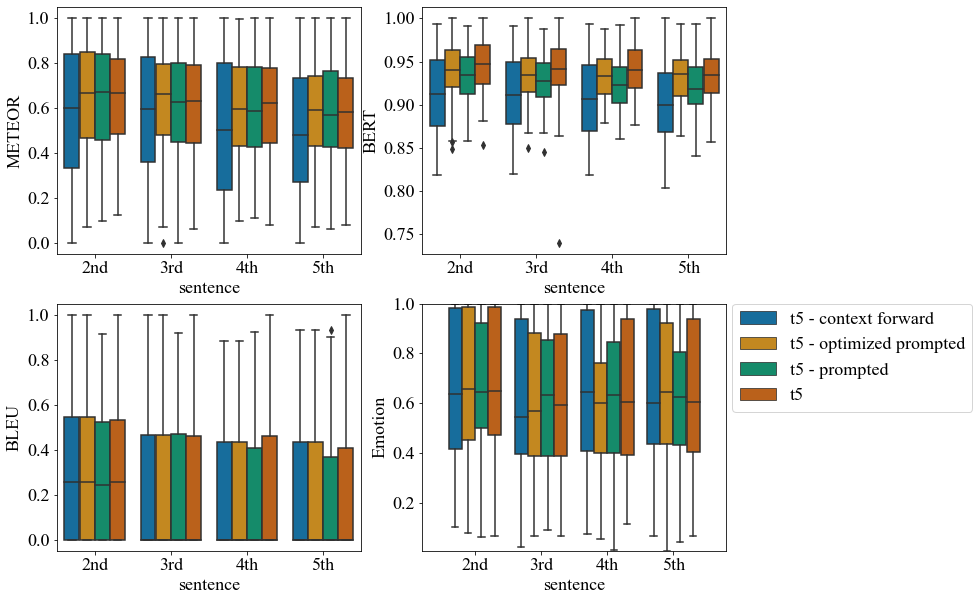

In [129]:
plt.rcParams['figure.figsize'] = (12.0, 10.0) 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'font.family': 'Times New Roman'})
plt.subplots_adjust(hspace=0.2, wspace=0.2)
ax = plt.subplot(2,2,1)
sns.boxplot(y= 'METEOR', x='sentence', data = getDataInfoMetric('METEOR'), palette="colorblind", hue='model', dodge = True)
ax.get_legend().remove()
ax = plt.subplot(2,2,2)
sns.boxplot(y= 'BERT', x='sentence', data = getDataInfoMetric('BERT'), palette="colorblind", hue='model', dodge = True)
ax.get_legend().remove()
ax = plt.subplot(2,2,3)
sns.boxplot(y= 'BLEU', x='sentence', data = getDataInfoMetric('BLEU'), palette="colorblind", hue='model', dodge = True)
ax.get_legend().remove()
ax = plt.subplot(2,2,4)
sns.boxplot(y= 'Emotion', x='sentence', data = getDataInfoMetric('Emotion'), palette="colorblind", hue='model', dodge = True)
# ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.autoscale(tight=True)
plt.savefig('result.pdf', bbox_inches="tight")

<Figure size 864x720 with 0 Axes>

In [11]:
BLEUCheck

{'./baselineCompare\\result-0.csv': 0.820738455719877,
 './baselineCompare\\result-1.csv': 0.47778989723428295,
 './baselineCompare\\result-10.csv': 0.8481399445589972,
 './baselineCompare\\result-100.csv': 0.6797201794723277,
 './baselineCompare\\result-1000.csv': 0.2,
 './baselineCompare\\result-1001.csv': 0.8159879721660593,
 './baselineCompare\\result-1002.csv': 0.5245237475121194,
 './baselineCompare\\result-1003.csv': 0.3706486534273018,
 './baselineCompare\\result-1004.csv': 0.47136380111489223,
 './baselineCompare\\result-1005.csv': 0.6205241985773551,
 './baselineCompare\\result-1006.csv': 0.38072040072196894,
 './baselineCompare\\result-1007.csv': 0.7005157727753047,
 './baselineCompare\\result-1008.csv': 0.7228324267707955,
 './baselineCompare\\result-1009.csv': 0.36484735005292107,
 './baselineCompare\\result-101.csv': 0.44937737929415295,
 './baselineCompare\\result-1010.csv': 0.4,
 './baselineCompare\\result-1011.csv': 0.5619491422580899,
 './baselineCompare\\result-1012.

In [14]:
BLEUCheckSort = dict(sorted(BLEUCheck.items(), key=lambda item: item[1], reverse = True))

In [23]:
BLEUCheckSort
import shutil
for i in range(40):
    shutil.copyfile(list(BLEUCheckSort.keys())[i], f"./result{list(BLEUCheckSort.keys())[i].split('result')[-1].split('.')[0]}.csv")

In [56]:
getDataInfoMetric('Emotion')

ValueError: All arrays must be of the same length